# Preprocessing
In this notebook is performed the study of dataset and the data preprocessing...

In [1]:
import pandas as pd
#Import film dataset
moviesDataset = pd.read_csv("movies/dataset.csv", encoding="ISO-8859-1", on_bad_lines='skip', low_memory=False)

In [2]:
moviesDataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56384 entries, 0 to 56383
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   adult                 56384 non-null  int64 
 1   backdrop_path         38842 non-null  object
 2   genre_ids             56384 non-null  object
 3   tmdb_id               56384 non-null  int64 
 4   imdb_id               54943 non-null  object
 5   original_language     56384 non-null  object
 6   overview              54685 non-null  object
 7   popularity            56384 non-null  int64 
 8   poster_path           52826 non-null  object
 9   production_companies  46493 non-null  object
 10  production_countries  56384 non-null  object
 11  release_date          56335 non-null  object
 12  title                 56384 non-null  object
 13  vote_average          56384 non-null  int64 
 14  vote_count            56384 non-null  int64 
 15  casts                 54844 non-null

In [3]:
moviesDataset

,adult,backdrop_path,genre_ids,tmdb_id,imdb_id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,title,vote_average,vote_count,casts
0,0,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,Drama,2,tt0094675,fi,Taisto Kasurinen is a Finnish coal miner whose...,10,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,Villealfa Filmproductions,Finland,1988-10-21,Ariel,7,154,"Turo Pajala,Susanna Haavisto,Matti Pellonpää,E..."
1,0,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,Drama,3,tt0092149,fi,"An episode in the life of Nikander, a garbage ...",8,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,Villealfa Filmproductions,Finland,1986-10-17,Shadows in Paradise,7,154,"Matti Pellonpää,Kati Outinen,Sakari Kuosmanen,..."
2,0,/bCXLsO2MJWzYYBJoavGOZN5iqGn.jpg,Crime,5,tt0113101,en,It's Ted the Bellhop's first night on the job....,16,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg,"Miramax,A Band Apart",United States of America,1995-12-09,Four Rooms,6,2087,"Tim Roth,Jennifer Beals,Antonio Banderas,Valer..."
3,0,/5aXp2s4l6g5PcMMesIj63mx8hmJ.jpg,Action,6,tt0107286,en,"While racing to a boxing match, Frank, Mike, J...",12,/rYFAvSPlQUCebayLcxyK79yvtvV.jpg,"Universal Pictures,Largo Entertainment,JVC",Japan,1993-10-15,Judgment Night,6,224,"Emilio Estevez,Cuba Gooding Jr.,Denis Leary,St..."
4,0,NaN,Documentary,8,tt0825671,en,Timo Novotny labels his new project an experim...,3,/x7Sz339F2oC8mBf0DHCQpKizXaL.jpg,inLoops,Austria,2006-01-01,Life in Loops (A Megacities RMX),8,18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56379,0,/hLZkOUrh4m7DfYbzv3jDmzmag43.jpg,Drama,99994,tt0027727,en,Best friends Kenneth Reynolds and Raymond Jord...,1,/bXD0Li5JqEF1EMDPk55EU7desdw.jpg,Republic Pictures,United States of America,1936-05-26,Hearts in Bondage,4,5,"James Dunn,Mae Clarke,David Manners,Charlotte ..."
56380,0,/jQvfxZDmxbKujIPjaJrYxKyunmE.jpg,Action,99995,tt0032021,en,"When her brother is killed by sabotage, Irene ...",1,/oAdH287KAa0CnuLk24S16W9i9ez.jpg,RKO Radio Pictures,United States of America,1939-04-14,They Made Her a Spy,0,0,"Sally Eilers,Allan Lane,Fritz Leiber,Frank M. ..."
56381,0,/uAG9D0mTEHhYsJ20W8Pk8i3SDn8.jpg,Drama,99997,tt0027196,en,An army sergeant inspires his son to become an...,1,/enNyJlQOMDnvO0CRsUEN9k67gxJ.jpg,Metro-Goldwyn-Mayer,United States of America,1935-03-23,West Point of the Air,7,1,"Wallace Beery,Robert Young,Lewis Stone,Maureen..."
56382,0,/wS0lvCKBe2FdCHhXQgSPU8lozbG.jpg,Drama,99998,tt0032130,en,Jerry tries to out compete his older brother C...,1,/zMKsZT963XmhGTmC5q23j45Kt9n.jpg,Warner Bros. Pictures,United States of America,1939-02-11,Wings of the Navy,6,3,"George Brent,Olivia de Havilland,John Payne,Fr..."


In [4]:
#Drop duplicates
moviesDataset.drop_duplicates(subset=['tmdb_id'], keep="first", inplace=True)

In [5]:
#Unnecessary data drop
reducedDataset = moviesDataset[['genre_ids', 'overview']]

In [6]:
import numpy as np
#Remove films without genres or plot or films tha have an irrelevant plot
reducedDataset = reducedDataset[~reducedDataset.genre_ids.str.len().eq(0)]
reducedDataset = reducedDataset.replace(r'^\s*$', np.nan, regex=True)
reducedDataset = reducedDataset.dropna(axis=0, how='any')
reducedDataset = reducedDataset[~(reducedDataset.overview.str.len() <= 30)]

reducedDataset = reducedDataset.reset_index(drop=True)

In [7]:
reducedDataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51637 entries, 0 to 51636
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_ids  51637 non-null  object
 1   overview   51637 non-null  object
dtypes: object(2)
memory usage: 807.0+ KB


In [8]:
#Genres distribution view function
def genresDistribution(data, index):
    sns.set_style('darkgrid')
    plt.figure(figsize=(18, 6))
    ax = sns.countplot(x=index, data=data)
    ax.set(title='Class distribution')
    ax.set(ylabel='Number of samples')
    ax.set(xlabel='Genres')
    plt.show()

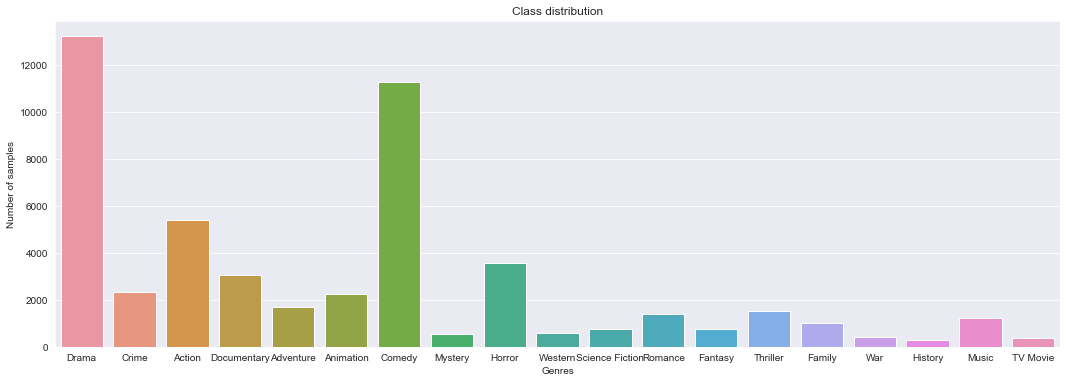

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#Genres distribution view
genresDistribution(reducedDataset, 'genre_ids')

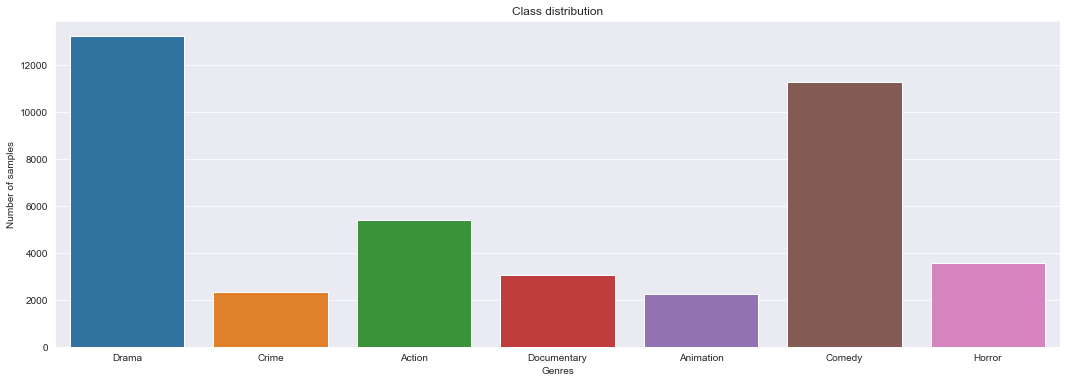

In [10]:
#Select only the information needed, drop genres that can be very similar each otehr to those already present
dropGenres = ['Adventure', 'Mystery', 'Western', 'Science Fiction', 'Romance', 'Fantasy', 'Thriller', 'Family', 'War', 'History', 'Music', 'TV Movie']
reducedDataset = reducedDataset[~reducedDataset['genre_ids'].isin(dropGenres)]
genresDistribution(reducedDataset, 'genre_ids')

In [11]:
import re

#Text cleaning function
def textCleaning(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]", " ", text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [12]:
#Apply text cleaning
reducedDataset['overview'] = reducedDataset['overview'].apply(lambda x: textCleaning(x))
reducedDataset

,genre_ids,overview
0,Drama,taisto kasurinen is a finnish coal miner whose...
1,Drama,an episode in the life of nikander a garbage m...
2,Crime,its ted the bellhops first night on the job an...
3,Action,while racing to a boxing match frank mike john...
4,Documentary,timo novotny labels his new project an experim...
...,...,...
51632,Drama,best friends kenneth reynolds and raymond jord...
51633,Action,when her brother is killed by sabotage irene e...
51634,Drama,an army sergeant inspires his son to become an...
51635,Drama,jerry tries to out compete his older brother c...


In [13]:
import nltk

#frequency distribution of ngrams function
def freqWords(x, terms):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = nltk.FreqDist(all_words)
    
    words_df = pd.DataFrame({'Words': list(fdist.keys()), 'Frequencies': list(fdist.values())})
    d = words_df.nlargest(columns="Frequencies", n=terms)
    
    # visualize words and frequencies
    plt.figure(figsize=(12, 15))
    ax = sns.barplot(data=d, x="Frequencies", y="Words")
    ax.set(ylabel='Words')
    plt.show()

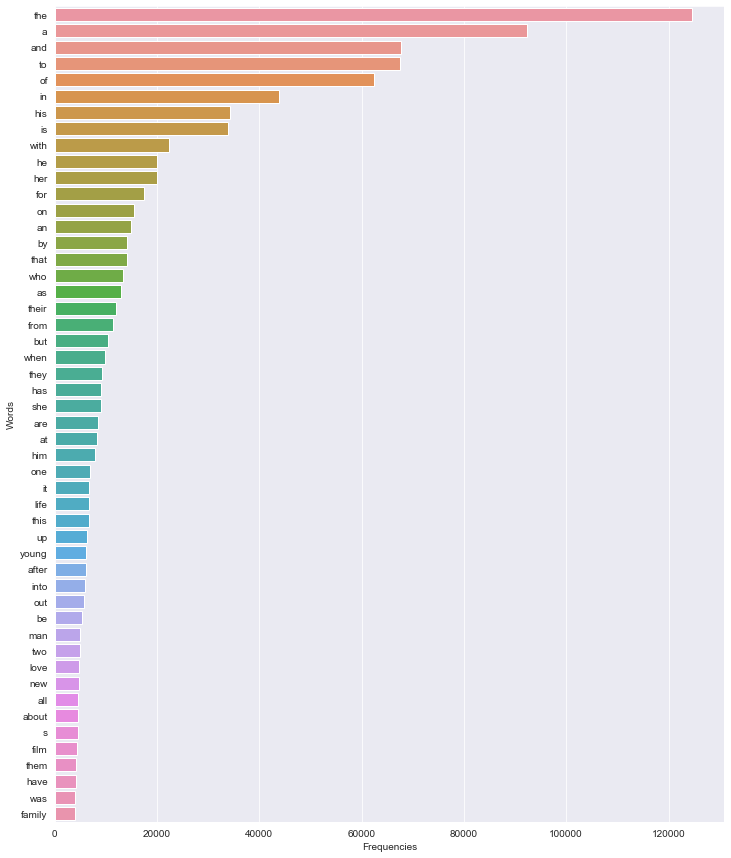

In [14]:
#Visualize dataset freq words
freqWords(reducedDataset['overview'], 50)

In [15]:
import numpy as np

#Return the media number of words per sample given text
def wordsPerSample(text):
    num_words = [len(s.split()) for s in text]
    return np.median(num_words) 

In [16]:
#Print the median words for plot
wordsPerSample(reducedDataset['overview'])

48.0

In [17]:
#Fucntion to show the plot lenght distribution
def plotSampleLenghtDistrubution(text):
    plt.hist([len(s) for s in text], 50)
    plt.xlabel('Length of a plots')
    plt.ylabel('Number of words')
    plt.title('Plots length distribution')
    plt.show()

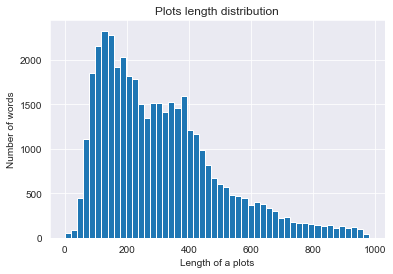

In [18]:
#View the plot lenght distribution
plotSampleLenghtDistrubution(reducedDataset['overview'])

In [19]:
#Function to remove stop words from text
def removeStopWords(text):
    stopwords = nltk.corpus.stopwords.words('english')
    #stopwords += nltk.corpus.names.words('male.txt') + nltk.corpus.names.words('female.txt')
    no_stopword_text = [w for w in text.split() if not w in stopwords]
    return ' '.join(no_stopword_text)

In [20]:
#Remove stop words
reducedDataset['overview'] = reducedDataset['overview'].apply(lambda x: removeStopWords(x))

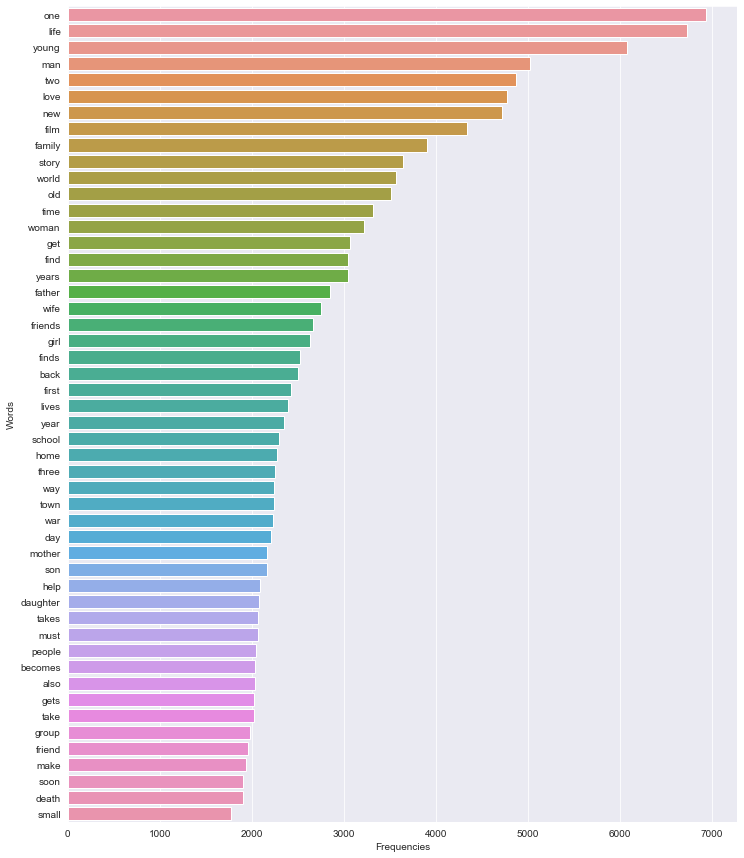

In [21]:
#Visualize dataset freq words without stop words
freqWords(reducedDataset['overview'], 50)

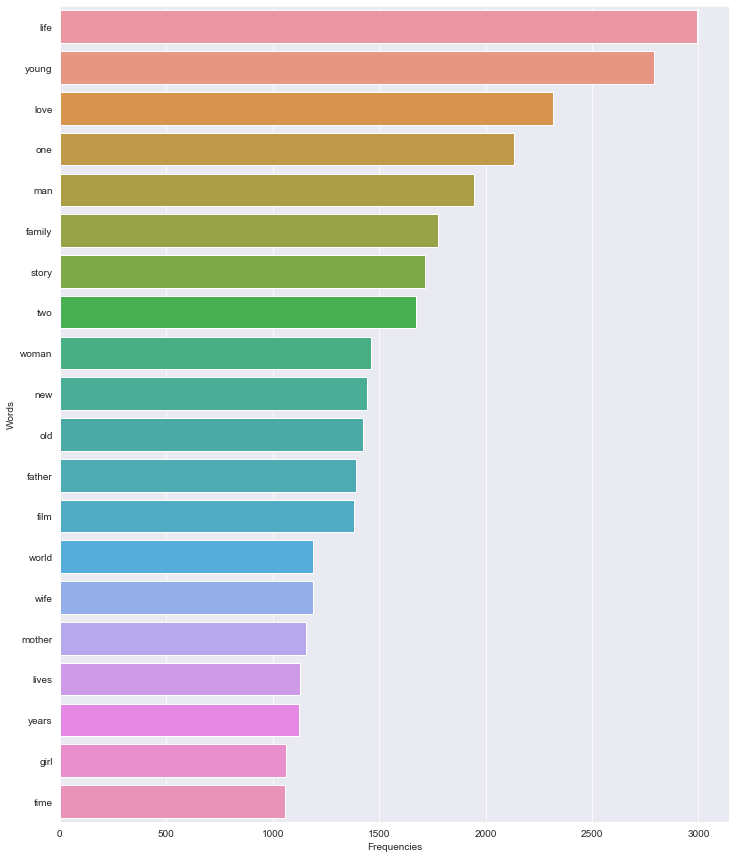

In [22]:
test = reducedDataset.loc[reducedDataset['genre_ids'] == "Drama"]
freqWords(test['overview'], 20)

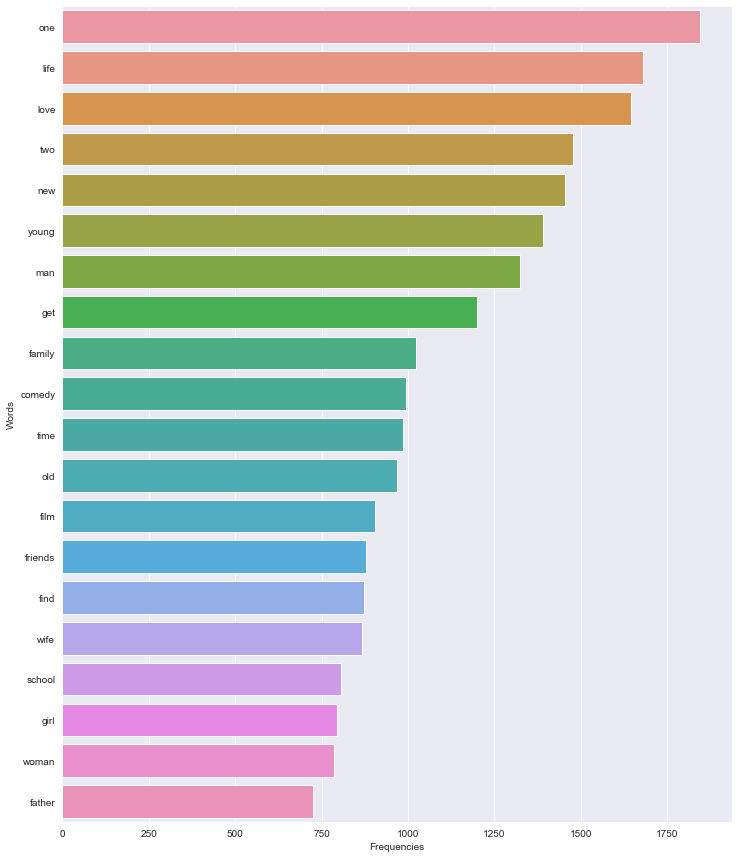

In [23]:
test = reducedDataset.loc[reducedDataset['genre_ids'] == "Comedy"]
freqWords(test['overview'], 20)

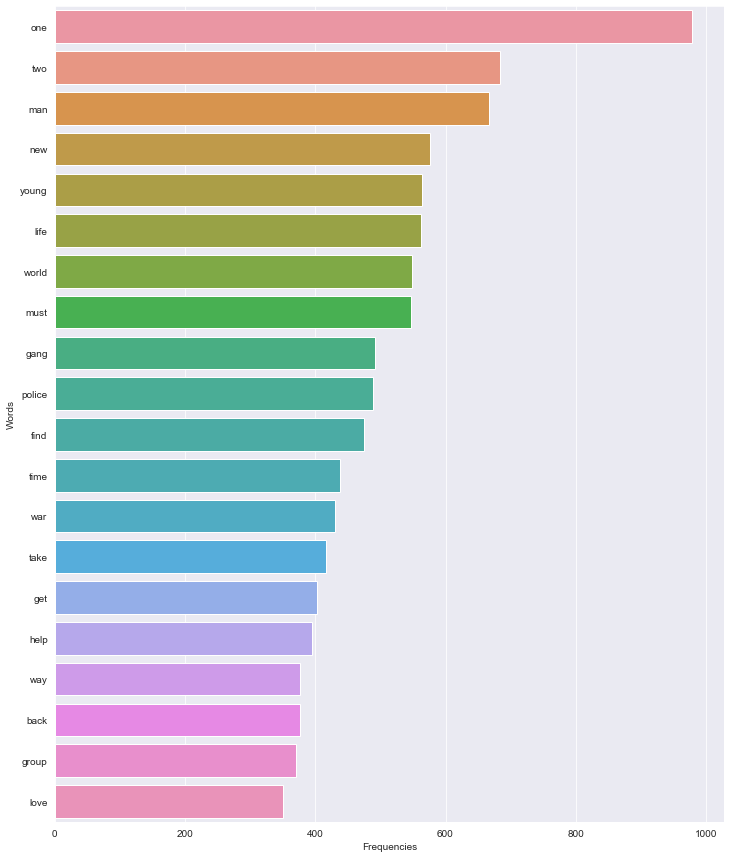

In [24]:
test = reducedDataset.loc[reducedDataset['genre_ids'] == "Action"]
freqWords(test['overview'], 20)

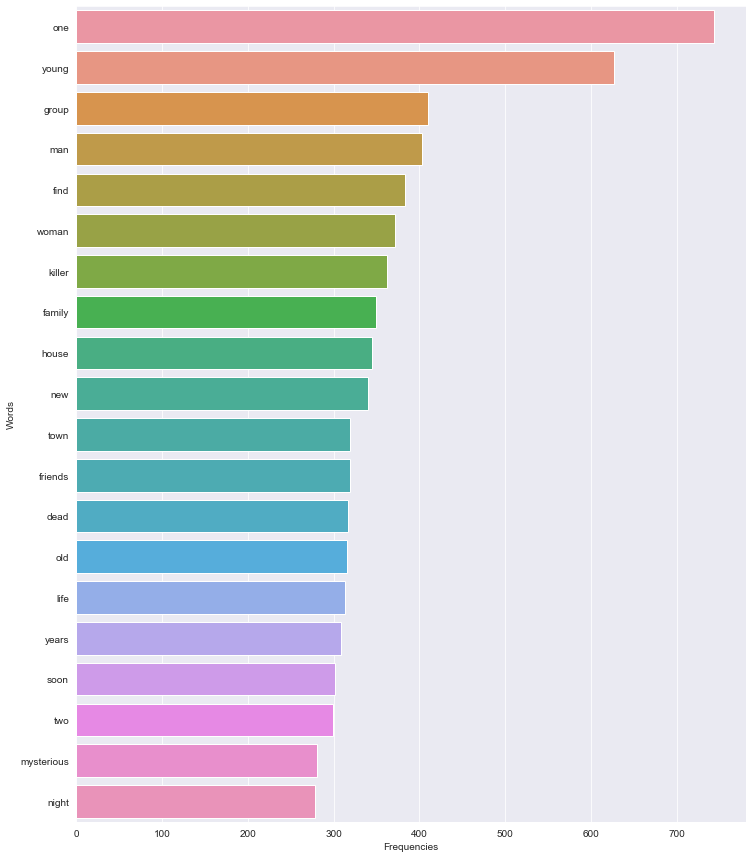

In [25]:
test = reducedDataset.loc[reducedDataset['genre_ids'] == "Horror"]
freqWords(test['overview'], 20)

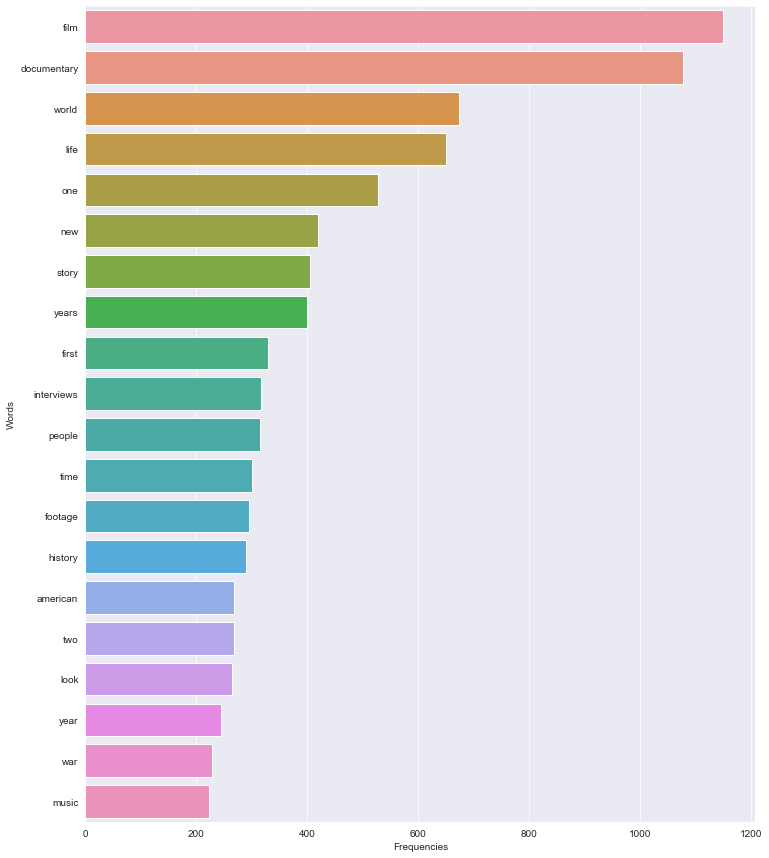

In [26]:
test = reducedDataset.loc[reducedDataset['genre_ids'] == "Documentary"]
freqWords(test['overview'], 20)

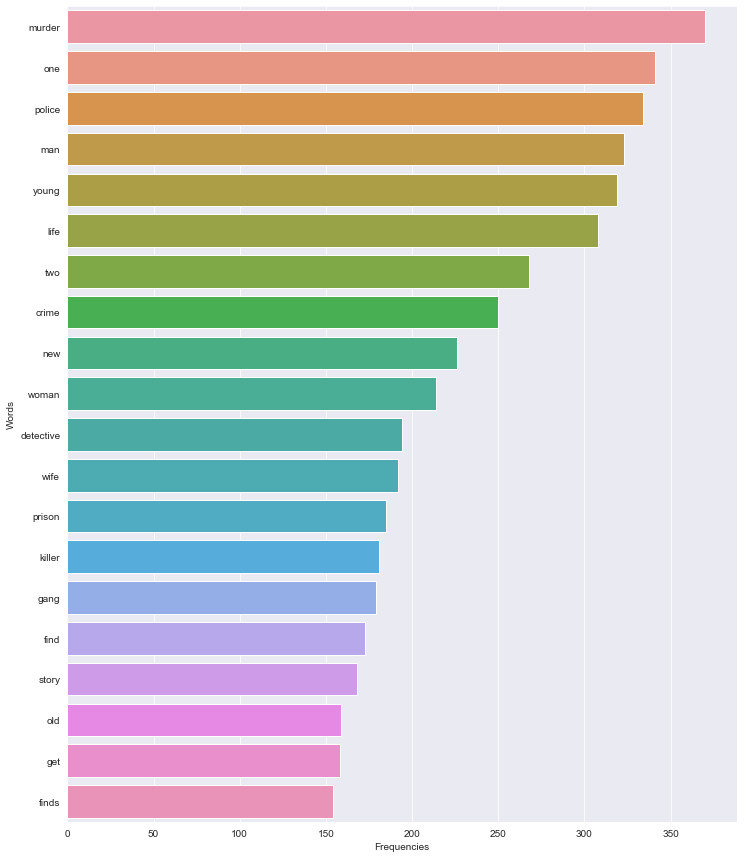

In [27]:
test = reducedDataset.loc[reducedDataset['genre_ids'] == "Crime"]
freqWords(test['overview'], 20)

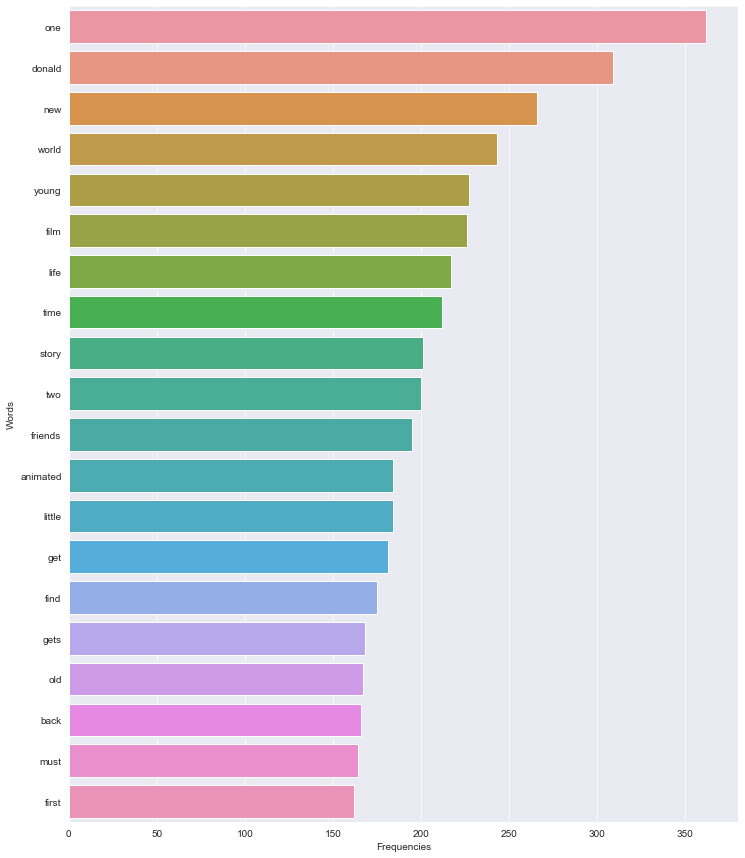

In [28]:
test = reducedDataset.loc[reducedDataset['genre_ids'] == "Animation"]
freqWords(test['overview'], 20)

In [29]:
def removeStopWords2(text):
    stopwords = ['one','life', 'love', 'two', 'young', 'man', 'new', 'womand', 'get', 'family', 'film', 'also', 'set', 'become',
                'comes', 'comes', 'best', 'even', 'movie', 'de', 'need', 'needs', 'needed', 'might', 'although', 'along', 'afterward', 'afterwards', 'already', 
                 'always', 'another', 'anothers', 'anytime', 'anything', 'anywhere', 'anyway', 'becoming', 'becomes', 'else',
                'another', 'elsewhere', 'everyone', 'everything', 'every', 'many', 'meanwhile', 'moreover', 'nothing', 'nothings',
                'nowhere', 'otherwise', 'perhaps', 'please', 'since', 'someone', 'something', 'sometime', 'sometimes', 'somewhere',
                'thereby', 'therefore', 'whatever', 'whenever', 'whereabouts', 'whereby']
    no_stopword_text = [w for w in text.split() if not w in stopwords]
    return ' '.join(no_stopword_text)

In [30]:
#Remove stop words
reducedDataset['overview'] = reducedDataset['overview'].apply(lambda x: removeStopWords2(x))

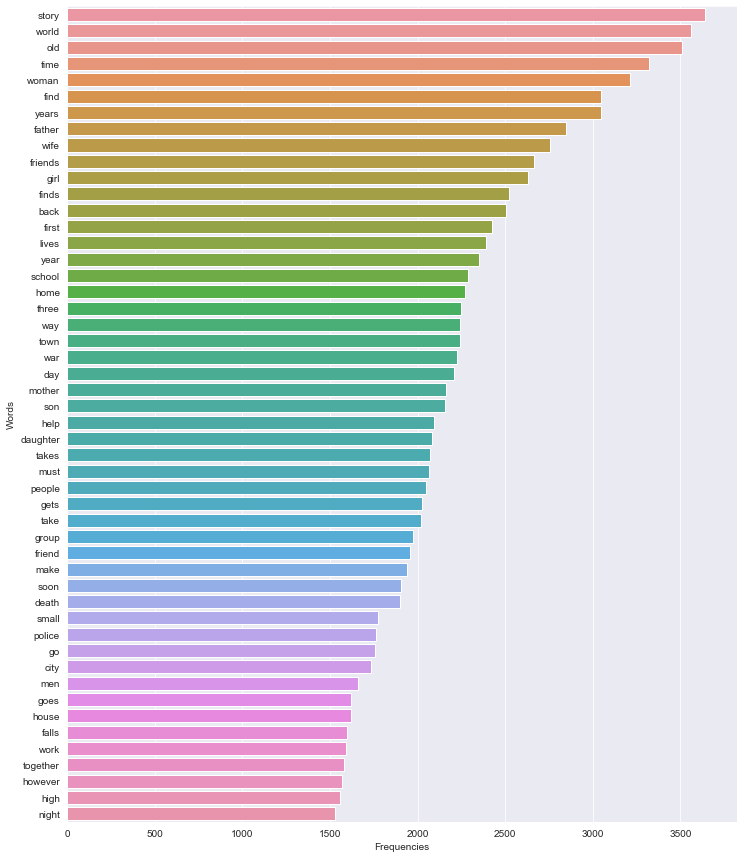

In [31]:
freqWords(reducedDataset['overview'], 50)

In [32]:
#Print the median words for plot without stop words
wordsPerSample(reducedDataset['overview'])

26.0

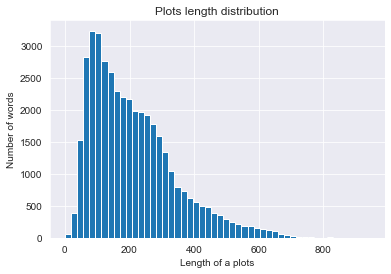

In [33]:
#View the plot lenght distribution without stop words
plotSampleLenghtDistrubution(reducedDataset['overview'])

In [34]:
#Save dataset to csv
reducedDataset.to_csv("movies/data.csv",  encoding="ISO-8859-1", index=False)